-------
<h2> EDA On Sales Dataset</h2>
<h2> Procedure for the analysis </h2>
    
<ol style= "color:red;
            font-size:20px;">
    <li> Importing Libraries</li>
    <li> Reading the  Data</li>
    <li> Getting basic inferences about the data</li>
    <li> Data Cleaning</li>
    <li> Data Visualization & Analysis </li>
    <li> Useful Insights</li>

</ol>




----
## **Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

-----
## Read Data

In [2]:
df=pd.read_csv("Dataset Of Sales.csv")

----
## **Getting an idea about the data its shape,size etc.**

In [3]:
df.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156    8/11/17    11/11/17    Second Class    CG-12520   
1       2  CA-2017-152156    8/11/17    11/11/17    Second Class    CG-12520   
2       3  CA-2017-138688    12/6/17  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966   11/10/16  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966   11/10/16  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name    Cost   Price  Profit  \
0                  Bush Somerset Collection Bookcase  464.48  901.06  436.58   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  756.10  138.70 -617.40   
2  Self-Adhesive Address Labels for Typewriters b...  537.68  159.28 -378.40   
3      Bretford CR4500 Series Slim Rectangular Table  875.91  445.88 -430.03   
4                     Eldon Fold 'N Roll Cart System  187.17  137.59  -49.58   

   Quantity        Sales  
0         4  3604.243977  
1        12  1664.369269  
2        12  1911.397750  
3        13  5796.463018  
4        19  2614.284944  

[5 rows x 22 columns]

In [4]:
df.shape

(9800, 22)

----
## Data Cleaning

In [5]:
df.describe()

Row ID   Postal Code         Cost        Price       Profit  \
count  9800.000000   9789.000000  9800.000000  9800.000000  9800.000000   
mean   4900.500000  55273.322403   501.552611   501.567655     0.014970   
std    2829.160653  32041.223413   288.124739   287.176206   407.314218   
min       1.000000   1040.000000     1.320000     1.060000  -978.860000   
25%    2450.750000  23223.000000   251.565000   252.965000  -290.637500   
50%    4900.500000  58103.000000   502.730000   503.710000    -2.520000   
75%    7350.250000  90008.000000   750.460000   744.435000   284.222500   
max    9800.000000  99301.000000   999.880000   999.920000   994.500000   

          Quantity         Sales  
count  9800.000000   9800.000000  
mean     12.967551   6503.923896  
std       7.241294   5614.159051  
min       1.000000      3.401739  
25%       7.000000   1880.221919  
50%      13.000000   4892.063281  
75%      19.000000   9876.885336  
max      25.000000  24973.493980

In [6]:
#To get the names of each column
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Cost', 'Price', 'Profit', 'Quantity', 'Sales'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Cost           9800 non-null   float64
 18  Price   

In [8]:
# Removing  unnecassary Columns

df.drop(['Row ID','Order ID','Customer ID','Customer Name'],axis=1,inplace=True)

In [9]:
# Displaying the duplicated rows if any

df[df.duplicated()]

Empty DataFrame
Columns: [Order Date, Ship Date, Ship Mode, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Cost, Price, Profit, Quantity, Sales]
Index: []

In [10]:
# Removing Duplicates

df.drop_duplicates(inplace=True)

In [11]:
# getting the number of null values in each column

df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Cost             0
Price            0
Profit           0
Quantity         0
Sales            0
dtype: int64

<p style="color:red;
          font-size:20px;"> --> The Number of Nulls in Postal Code Column is 11 </p>

In [12]:
# To display the rows which have nulls.

df[df.isnull().any(axis=1)]

Order Date   Ship Date       Ship Mode      Segment        Country  \
2234     5/12/18    10/12/18  Standard Class    Corporate  United States   
5274     7/11/16     9/11/16    Second Class     Consumer  United States   
8798      6/4/17     10/4/17  Standard Class  Home Office  United States   
9146  23/01/2017  27/01/2017  Standard Class    Corporate  United States   
9147  23/01/2017  27/01/2017  Standard Class    Corporate  United States   
9148  23/01/2017  27/01/2017  Standard Class    Corporate  United States   
9386  19/01/2018  23/01/2018  Standard Class     Consumer  United States   
9387  19/01/2018  23/01/2018  Standard Class     Consumer  United States   
9388  19/01/2018  23/01/2018  Standard Class     Consumer  United States   
9389  19/01/2018  23/01/2018  Standard Class     Consumer  United States   
9741     8/11/16    12/11/16  Standard Class    Corporate  United States   

            City    State  Postal Code Region       Product ID  \
2234  Burlington  Vermont          NaN   East  TEC-AC-10001013   
5274  Burlington  Vermont          NaN   East  FUR-CH-10000595   
8798  Burlington  Vermont          NaN   East  TEC-PH-10002555   
9146  Burlington  Vermont          NaN   East  TEC-AC-10002926   
9147  Burlington  Vermont          NaN   East  OFF-AR-10003477   
9148  Burlington  Vermont          NaN   East  OFF-ST-10001526   
9386  Burlington  Vermont          NaN   East  OFF-PA-10000157   
9387  Burlington  Vermont          NaN   East  OFF-PA-10001970   
9388  Burlington  Vermont          NaN   East  OFF-AP-10000828   
9389  Burlington  Vermont          NaN   East  OFF-EN-10001509   
9741  Burlington  Vermont          NaN   East  FUR-BO-10004834   

             Category Sub-Category  \
2234       Technology  Accessories   
5274        Furniture       Chairs   
8798       Technology       Phones   
9146       Technology  Accessories   
9147  Office Supplies          Art   
9148  Office Supplies      Storage   
9386  Office Supplies        Paper   
9387  Office Supplies        Paper   
9388  Office Supplies   Appliances   
9389  Office Supplies    Envelopes   
9741        Furniture    Bookcases   

                                           Product Name    Cost   Price  \
2234        Logitech ClearChat Comfort/USB Headset H390  840.60  466.13   
5274                    Safco Contoured Stacking Chairs  906.47  989.68   
8798                Nortel Meridian M5316 Digital phone   75.55  655.16   
9146              Logitech Wireless Marathon Mouse M705  328.86  962.57   
9147                                  4009 Highlighters  917.74  183.41   
9148              Iceberg Mobile Mega Data/Printer Cart  301.27  491.65   
9386                                          Xerox 191  165.70  457.56   
9387                                         Xerox 1881  451.39  331.66   
9388                    Avanti 4.4 Cu. Ft. Refrigerator  413.28  200.71   
9389                          Poly String Tie Envelopes  107.08  268.97   
9741  Riverside Palais Royal Lawyers Bookcase, Royal...  852.06  122.14   

      Profit  Quantity         Sales  
2234 -374.47         9   4195.172500  
5274   83.21        11  10886.482840  
8798  579.61         5   3275.788547  
9146  633.70         5   4812.829161  
9147 -734.33        19   3484.816957  
9148  190.37        18   8849.668181  
9386  291.86         6   2745.330842  
9387 -119.73        15   4974.895303  
9388 -212.57        25   5017.790802  
9389  161.88        16   4303.441065  
9741 -729.92         3    366.421725

In [13]:
# Now there should be no nulls
df.isna().sum().sum()

11

## **Data Visualization &  Analysis**

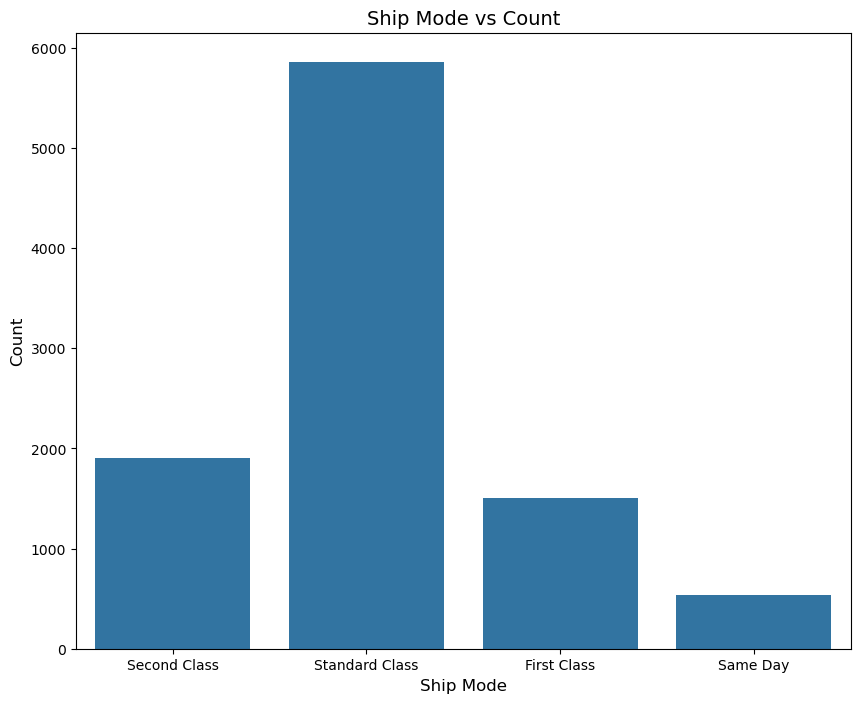

In [14]:
# 1. Ship Mode vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=df['Ship Mode'])

#Now will give labelling
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Ship Mode vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Standard Class is the most preferred ship mode


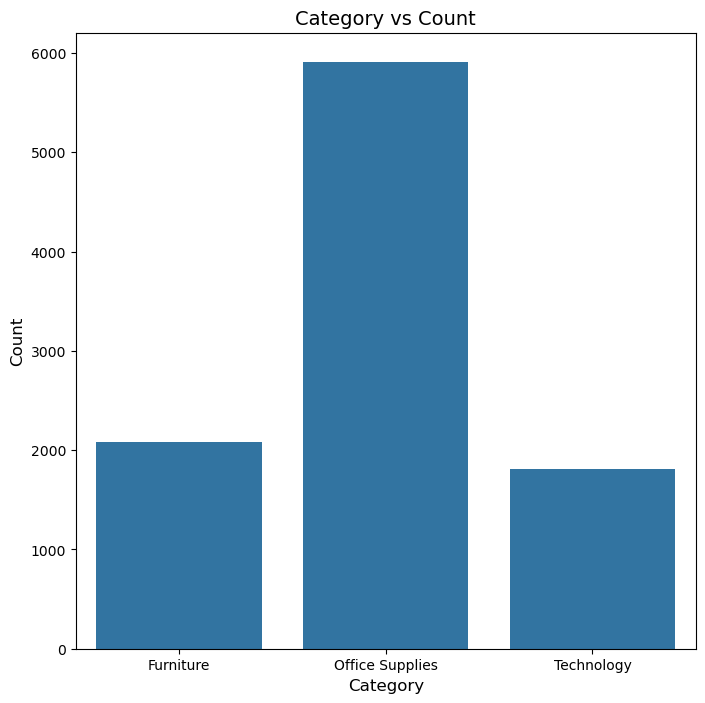

In [15]:
# 2. Category vs Count

plt.figure(figsize=(8,8))
sns.countplot(x=df['Category'])

#Labeling
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Category vs Count',fontsize=14)
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Category are Office Supplies


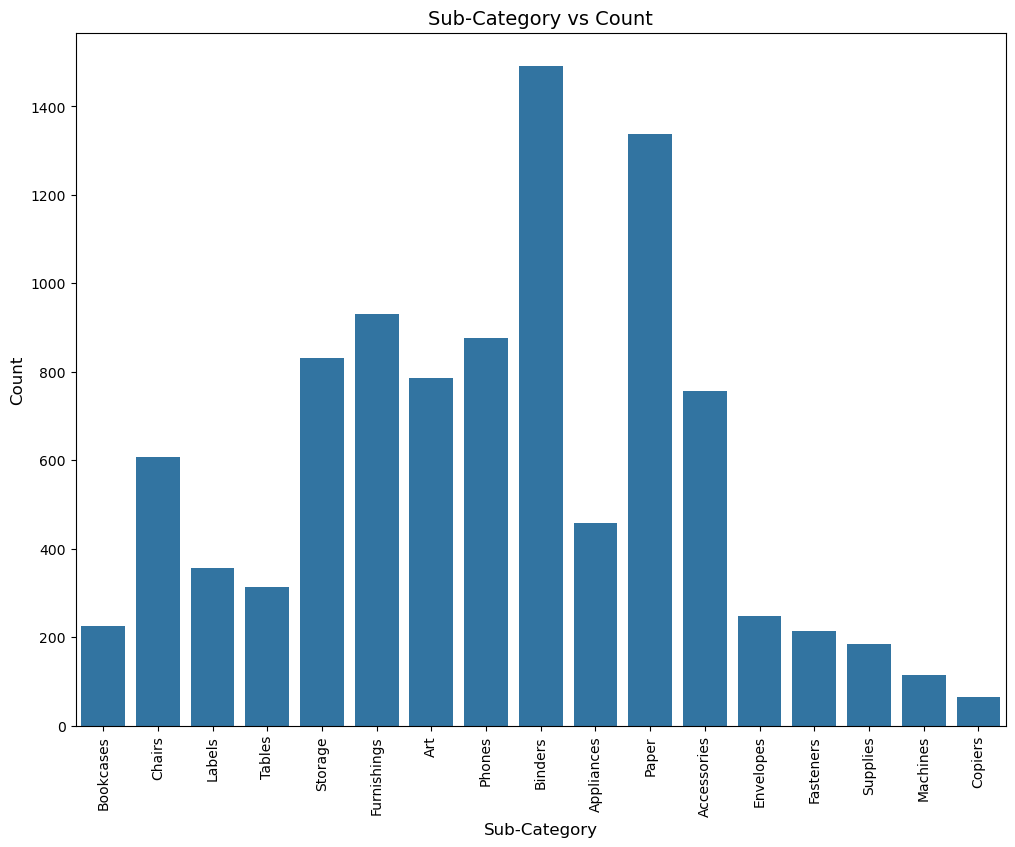

In [16]:
# Sub-Category vs Count

plt.figure(figsize=(12,9))
sns.countplot(x=df['Sub-Category'])

#Labeling
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

### <font color='red'> Result </font>: Most of the Orders in Sub_Category are Binders and Papers


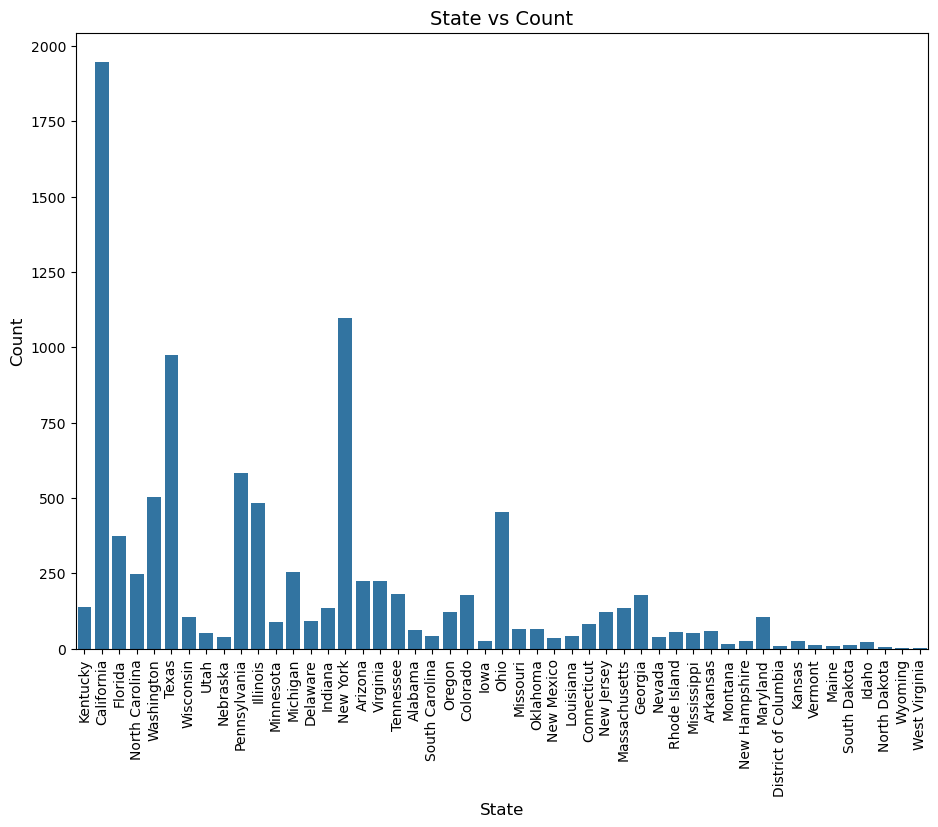

In [17]:
# 3. State vs Count

plt.figure(figsize=(11,8))
sns.countplot(x=df['State'])
#Labeling
plt.xlabel('State',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('State vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()
#city count is so much.

### <font color='red'> Result </font>: California and New York State have the highest number of orders

In [18]:
# Now some other data insights

# Sales of the Top 15 States
top_states=df.groupby(['State']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states

State        Sales
0       California  12316053.30
1         New York   7349814.33
2            Texas   6202895.93
3     Pennsylvania   3882386.82
4         Illinois   3292395.90
5       Washington   3175813.72
6             Ohio   3039303.20
7          Florida   2446196.88
8         Michigan   1687954.02
9   North Carolina   1639467.32
10        Virginia   1537701.25
11         Arizona   1375128.65
12       Tennessee   1279507.06
13         Georgia   1266775.63
14        Colorado   1173836.94

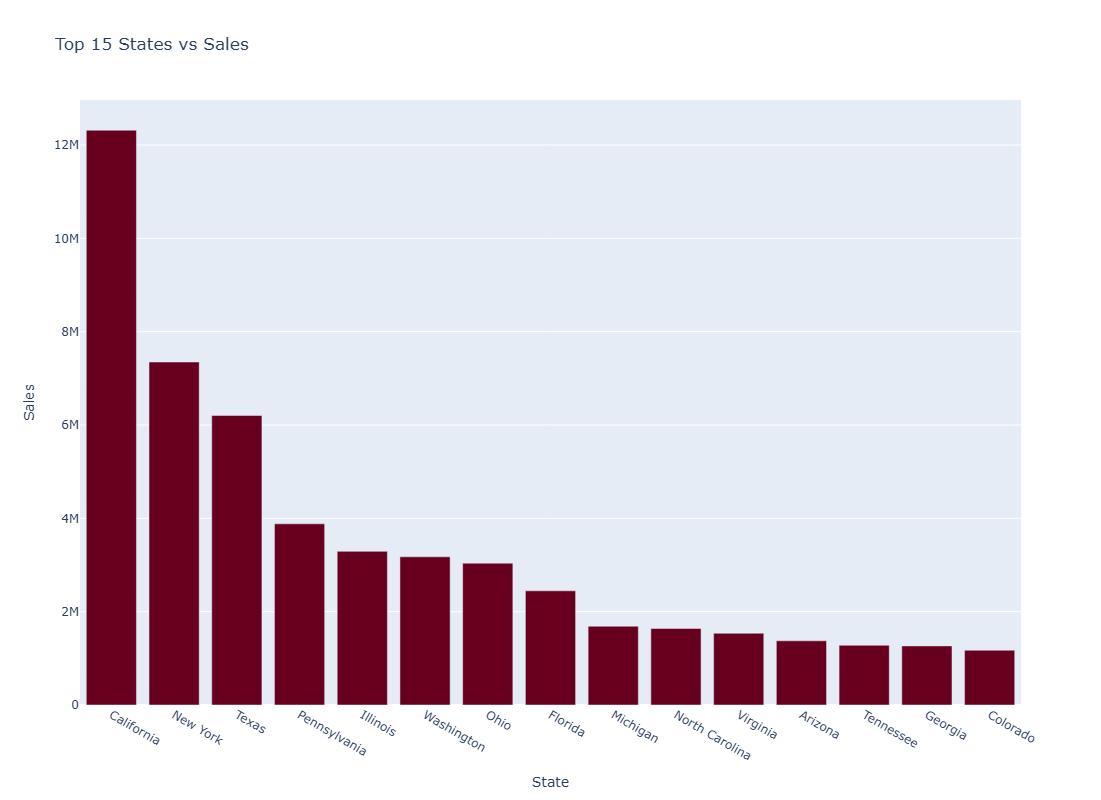

In [19]:
# Printing top 15 States vs Sales

fig=px.bar(top_states,x='State',y='Sales',title='Top 15 States vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from California and New York States

In [20]:
#Now city wise
# Sales of the Top 15 Cities

top_cities=df.groupby(['City']).sum('Sales').sort_values('Sales',ascending=False).head(15)
top_cities=top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities


City       Sales
0   New York City  5988692.27
1     Los Angeles  4651551.02
2    Philadelphia  3507944.50
3   San Francisco  3258202.64
4         Seattle  2746553.42
5         Houston  2328067.37
6         Chicago  1967317.61
7        Columbus  1556920.18
8       San Diego  1042551.39
9     Springfield  1006827.92
10         Dallas   946643.99
11        Detroit   787939.40
12   Jacksonville   761436.80
13        Jackson   580562.36
14       Richmond   506115.17

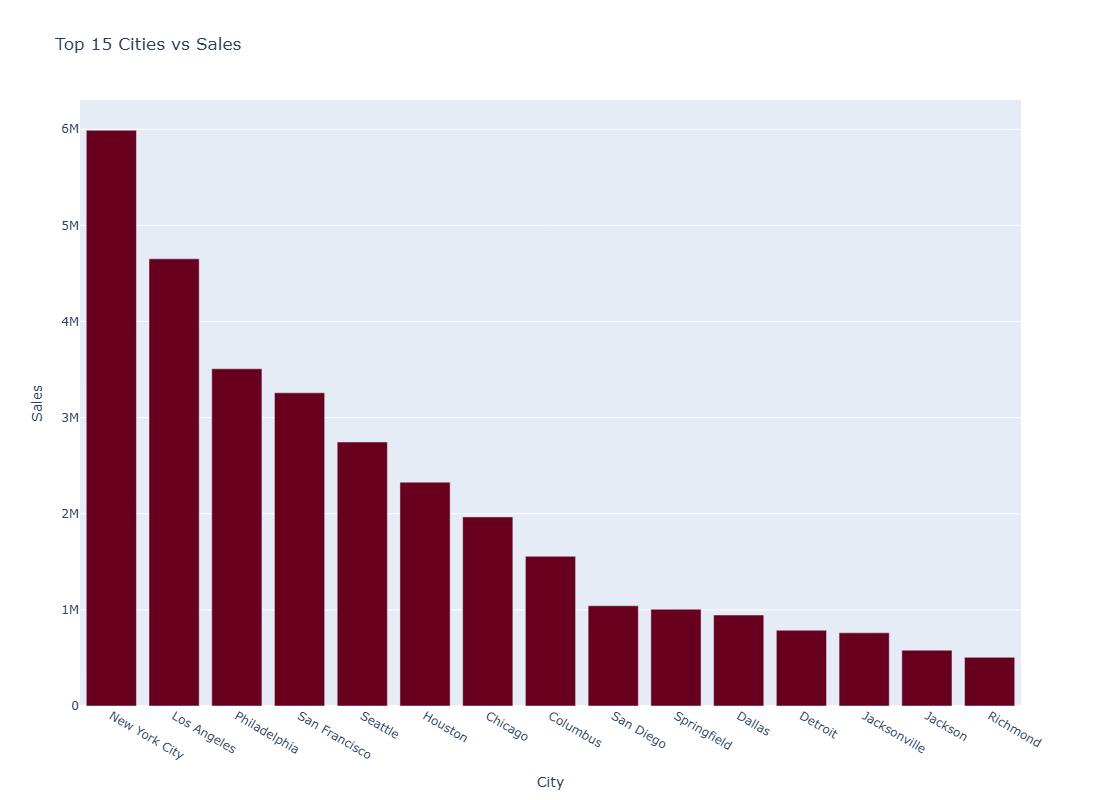

In [21]:
# Top 15 Cities vs Sales

fig=px.bar(top_cities,x='City',y='Sales',title='Top 15 Cities vs Sales',height=800,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from New York City and Los Angeles

In [22]:
# Insights from different cities
# Sales of the Categories

Categories=df.groupby('Category').sum('Sales').sort_values('Sales',ascending=False)
Categories=Categories[['Sales']].round(2)
Categories.reset_index(inplace=True)
Categories

Category        Sales
0  Office Supplies  38217413.62
1        Furniture  13446724.57
2       Technology  12074316.00

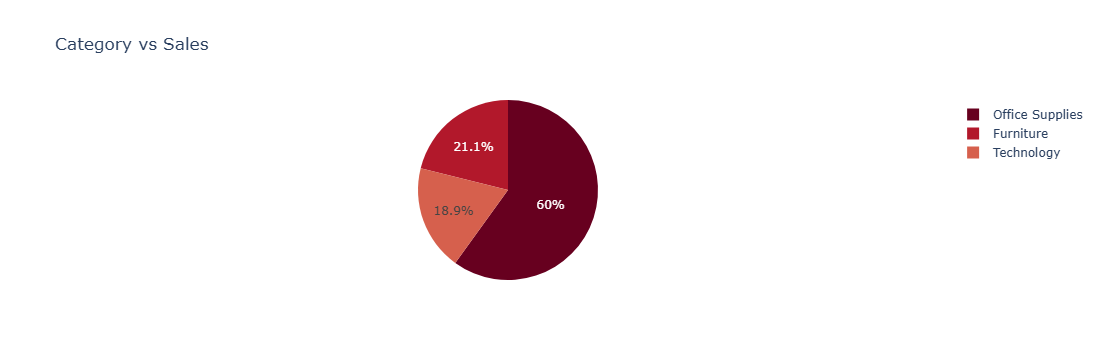

In [23]:
# Category vs Sales

fig=px.pie(Categories,names='Category',values='Sales',title='Category vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Technology Products contribute most to the sales

In [24]:
# Sales of the Segments

Segments= df.groupby("Segment").sum('Sales').sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)
Segments

Segment        Sales
0     Consumer  33332237.04
1    Corporate  18743348.54
2  Home Office  11662868.60

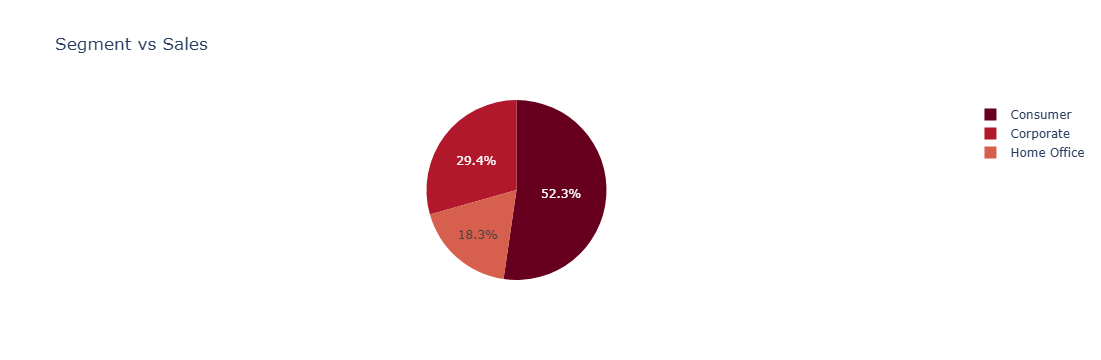

In [25]:
# Segment vs Sales

fig=px.pie(Segments,names='Segment',values='Sales',title='Segment vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from Consumers

In [26]:
# Sales of the Regions

Regions=df.groupby('Region').sum('Sales').sort_values('Sales',ascending=False)
Regions=Regions[['Sales']].round(2)
Regions.reset_index(inplace=True)
Regions

Region        Sales
0     West  19966670.41
1     East  18409685.22
2  Central  14741915.57
3    South  10620182.97

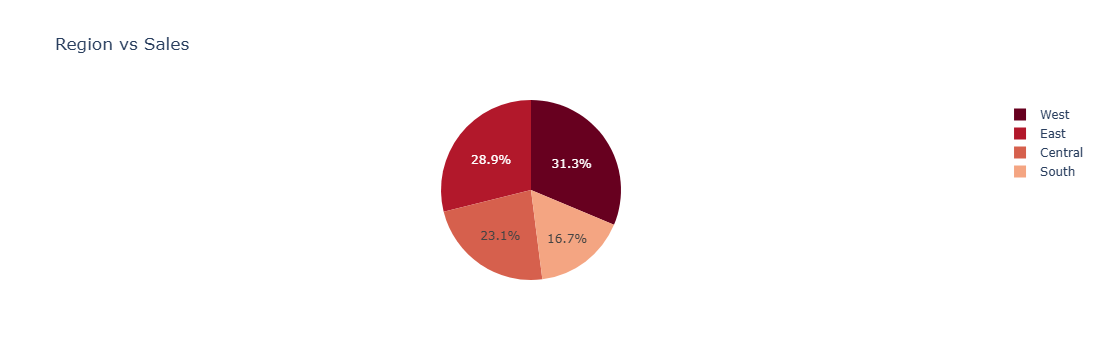

In [27]:
# Region vs Sales

fig=px.pie(Regions,names='Region',values='Sales',title='Region vs Sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### <font color='red'> Result </font>: Most of the Sales are from West Region

In [28]:
# Sales of Top 10 Products

Products=df.groupby('Product Name').sum('Sales').sort_values('Sales',ascending=False).head(10)
Products=Products[['Sales']].round(2)
Products.reset_index(inplace=True)
Products

Product Name      Sales
0                                          Staples  311336.58
1                                  Staple envelope  282098.07
2                                Easy-staple paper  280117.64
3                          Storex Dura Pro Binders  163284.64
4                          Staples in misc. colors  162561.90
5                                   Staple remover  131319.69
6  Global Wood Trimmed Manager's Task Chair, Khaki  131021.39
7                       Staple-based wall hangings  126242.44
8                                       Newell 333  113172.75
9         Wilson Electronics DB Pro Signal Booster  110575.09

### <font color='red'> Result </font>: The Canon imageCLASS 2200 Advanced Copier Product acheived the most Sales

**Multivariate analysis**

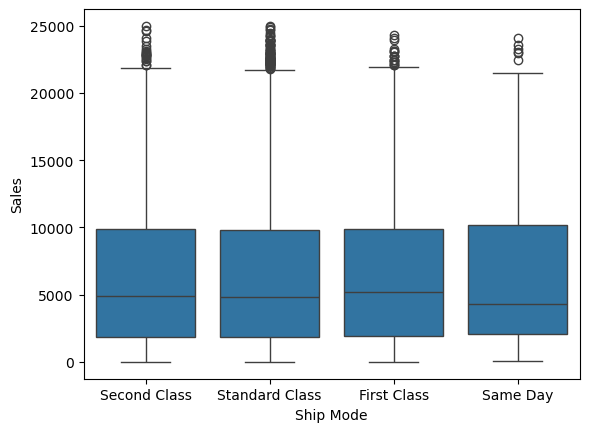

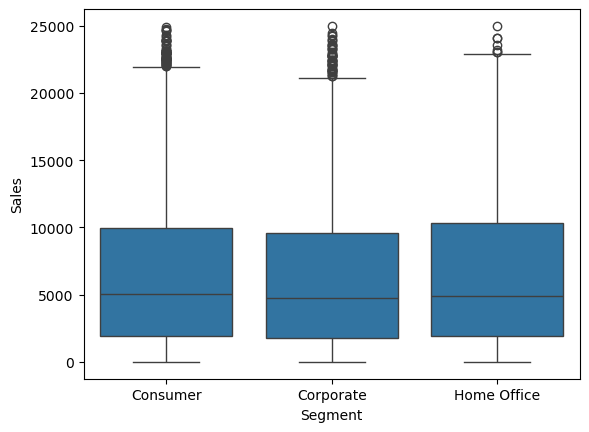

In [29]:
# 1. Boxplot of Sales vs Ship Mode
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.show()

# 2.  Boxplot of Sales vs Segment
sns.boxplot(x='Segment', y='Sales', data=df)
plt.show()


In [30]:
#  Pivot table for Sales by Region and Category
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
print(pivot_table)


Category     Furniture  Office Supplies    Technology
Region                                               
Central   3.139736e+06     9.206667e+06  2.395513e+06
East      3.823634e+06     1.095057e+07  3.635478e+06
South     2.197586e+06     6.534496e+06  1.888101e+06
West      4.285769e+06     1.152568e+07  4.155224e+06


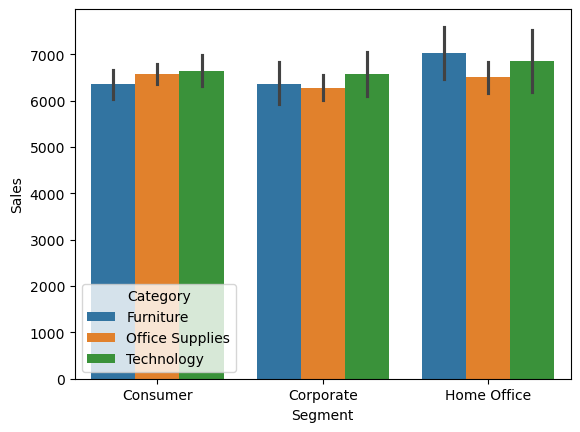

In [31]:
# 4. Sales by Segment and Category
sns.barplot(x='Segment', y='Sales', hue='Category', data=df)
plt.show()


### Results:
- **Observation**: Most of the Sales are from the **Technology segment** followed by **Furniture**.

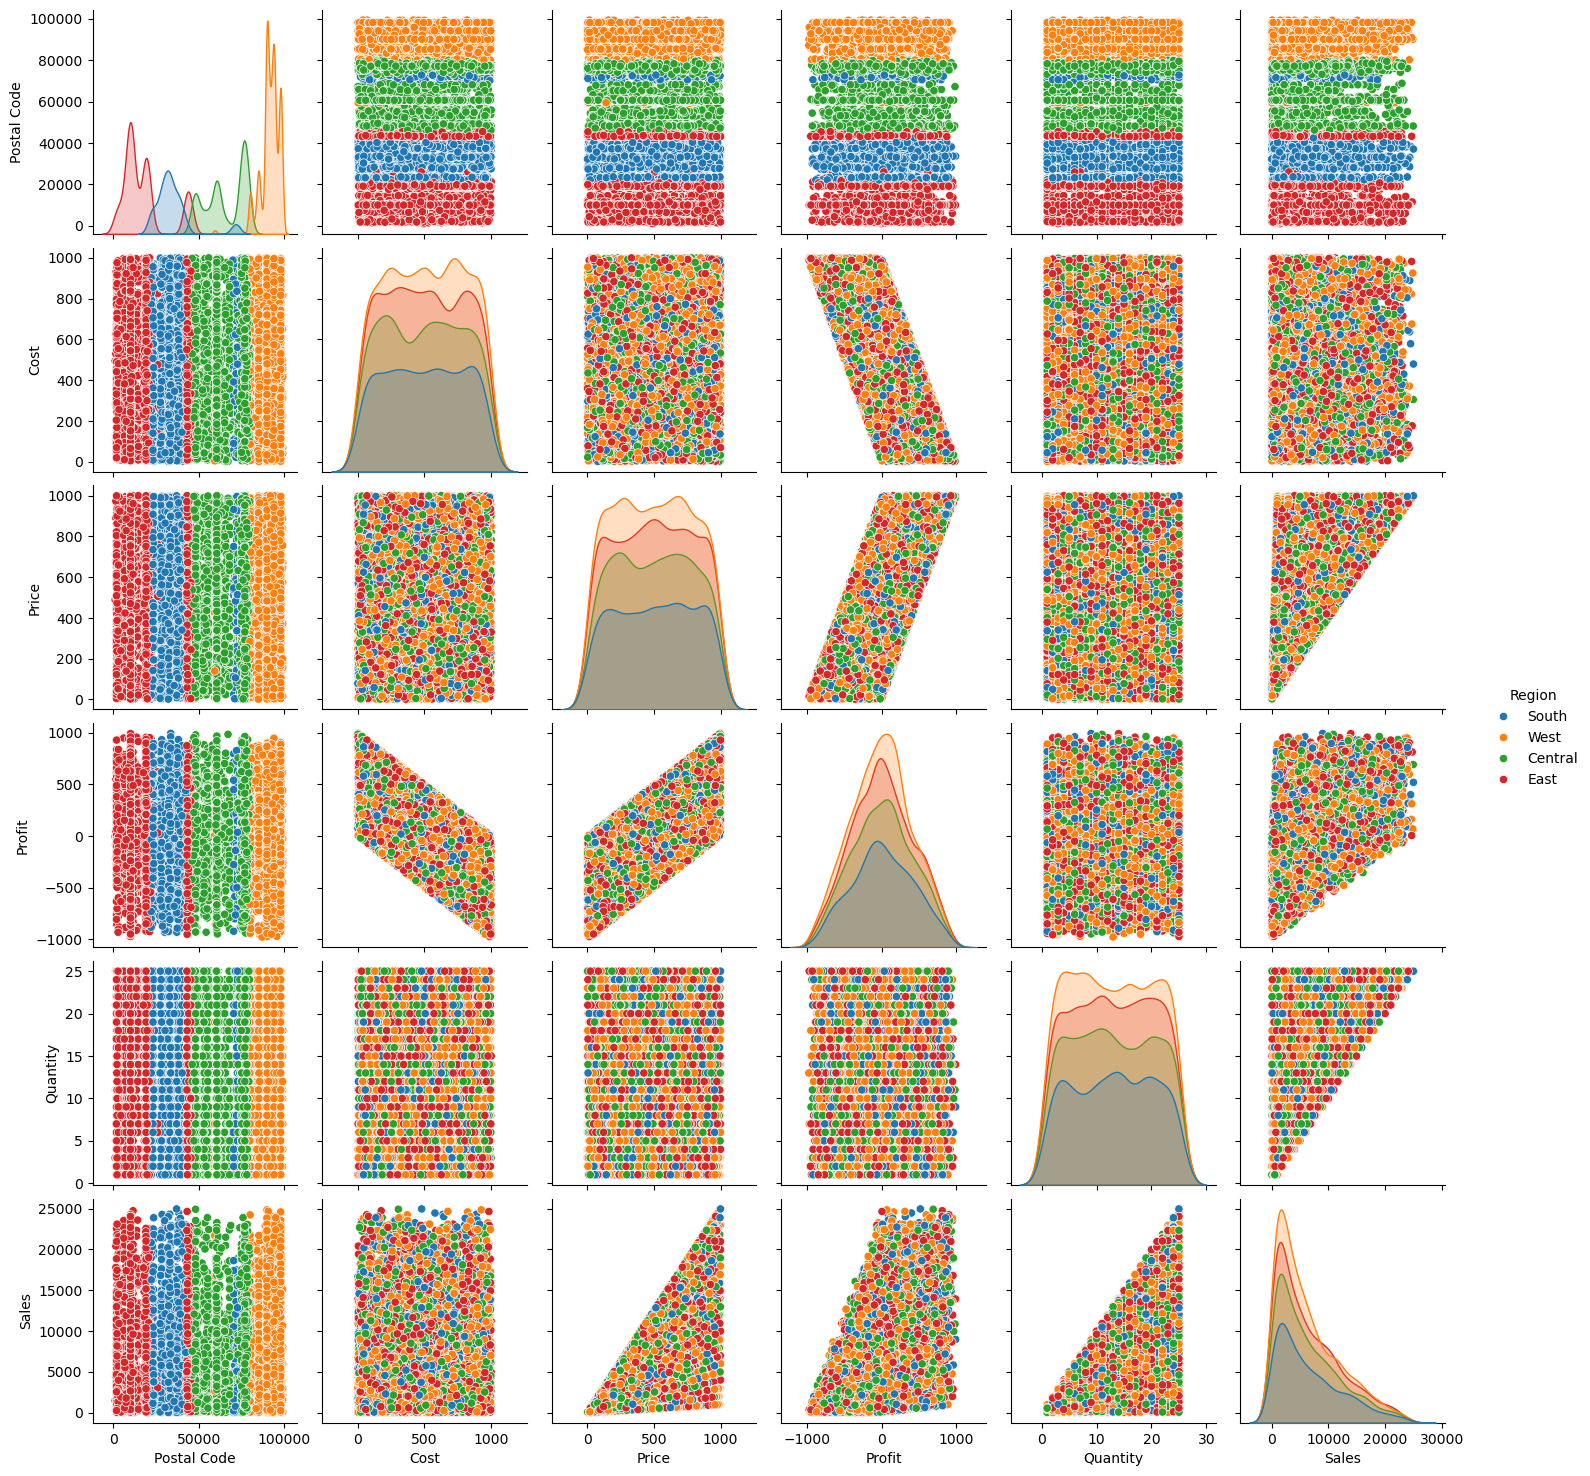

In [32]:
# 5. Pair plot for numerical columns
sns.pairplot(df, hue='Region')
plt.show()


-----
## <font color=brown> Inferences from the analysis  </font>
<ul style= "color:black;
            font-size:18px;">
    <li> Consumers have the most number of orders</li>
    <li> Standard Class is the most preferred Ship Mode</li>
    <li> California and New York States contribute most to orders</li>
    <li> Most of the Orders in Category are Office Supplies</li>
    <li> Most of the Orders in Sub-Category are Binders and Papers</li>
    <li> Most of the Sales are from New York City and Los Angeles </li>
    <li> Technology Products have the maximum number of sales </li>
    <li> West Region has the most sales region wise</li>
    <li> Most of the Sales are from Consumers</li>
    <li> The Product with the most sales is "The Canon imageCLASS 2200 Advanced Copier"</li>
</ul>